<a href="https://colab.research.google.com/github/kkalla619/Lab-2/blob/main/Copy_of_MATH_2315_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [3]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

The code imports the necessary libraries for data analysis and modeling

## Lab introduction

We will be working with the IMDB movies data set from the vega data sets. We will ask the following questions:

1.  Do movies that are more expensive to produce make more money worldwide?
2.  Do movie ratings (IMDB or Rotten Tomatoes) help predict the worldwide gross of a movie?




## Import and set up the data set

### Load the data



In [4]:
from vega_datasets import data

Create a Pandas data frame for the movies data set.

In [5]:
df = data.movies()

For simplicity, remove any rows that have NaN's from the data frame.

In [6]:
df = df.dropna()

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [7]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


## Exploratory data analysis

##### $\rightarrow$ Make a pair plot to explore relationships between the numerical variables in the data set. 

##### Solution

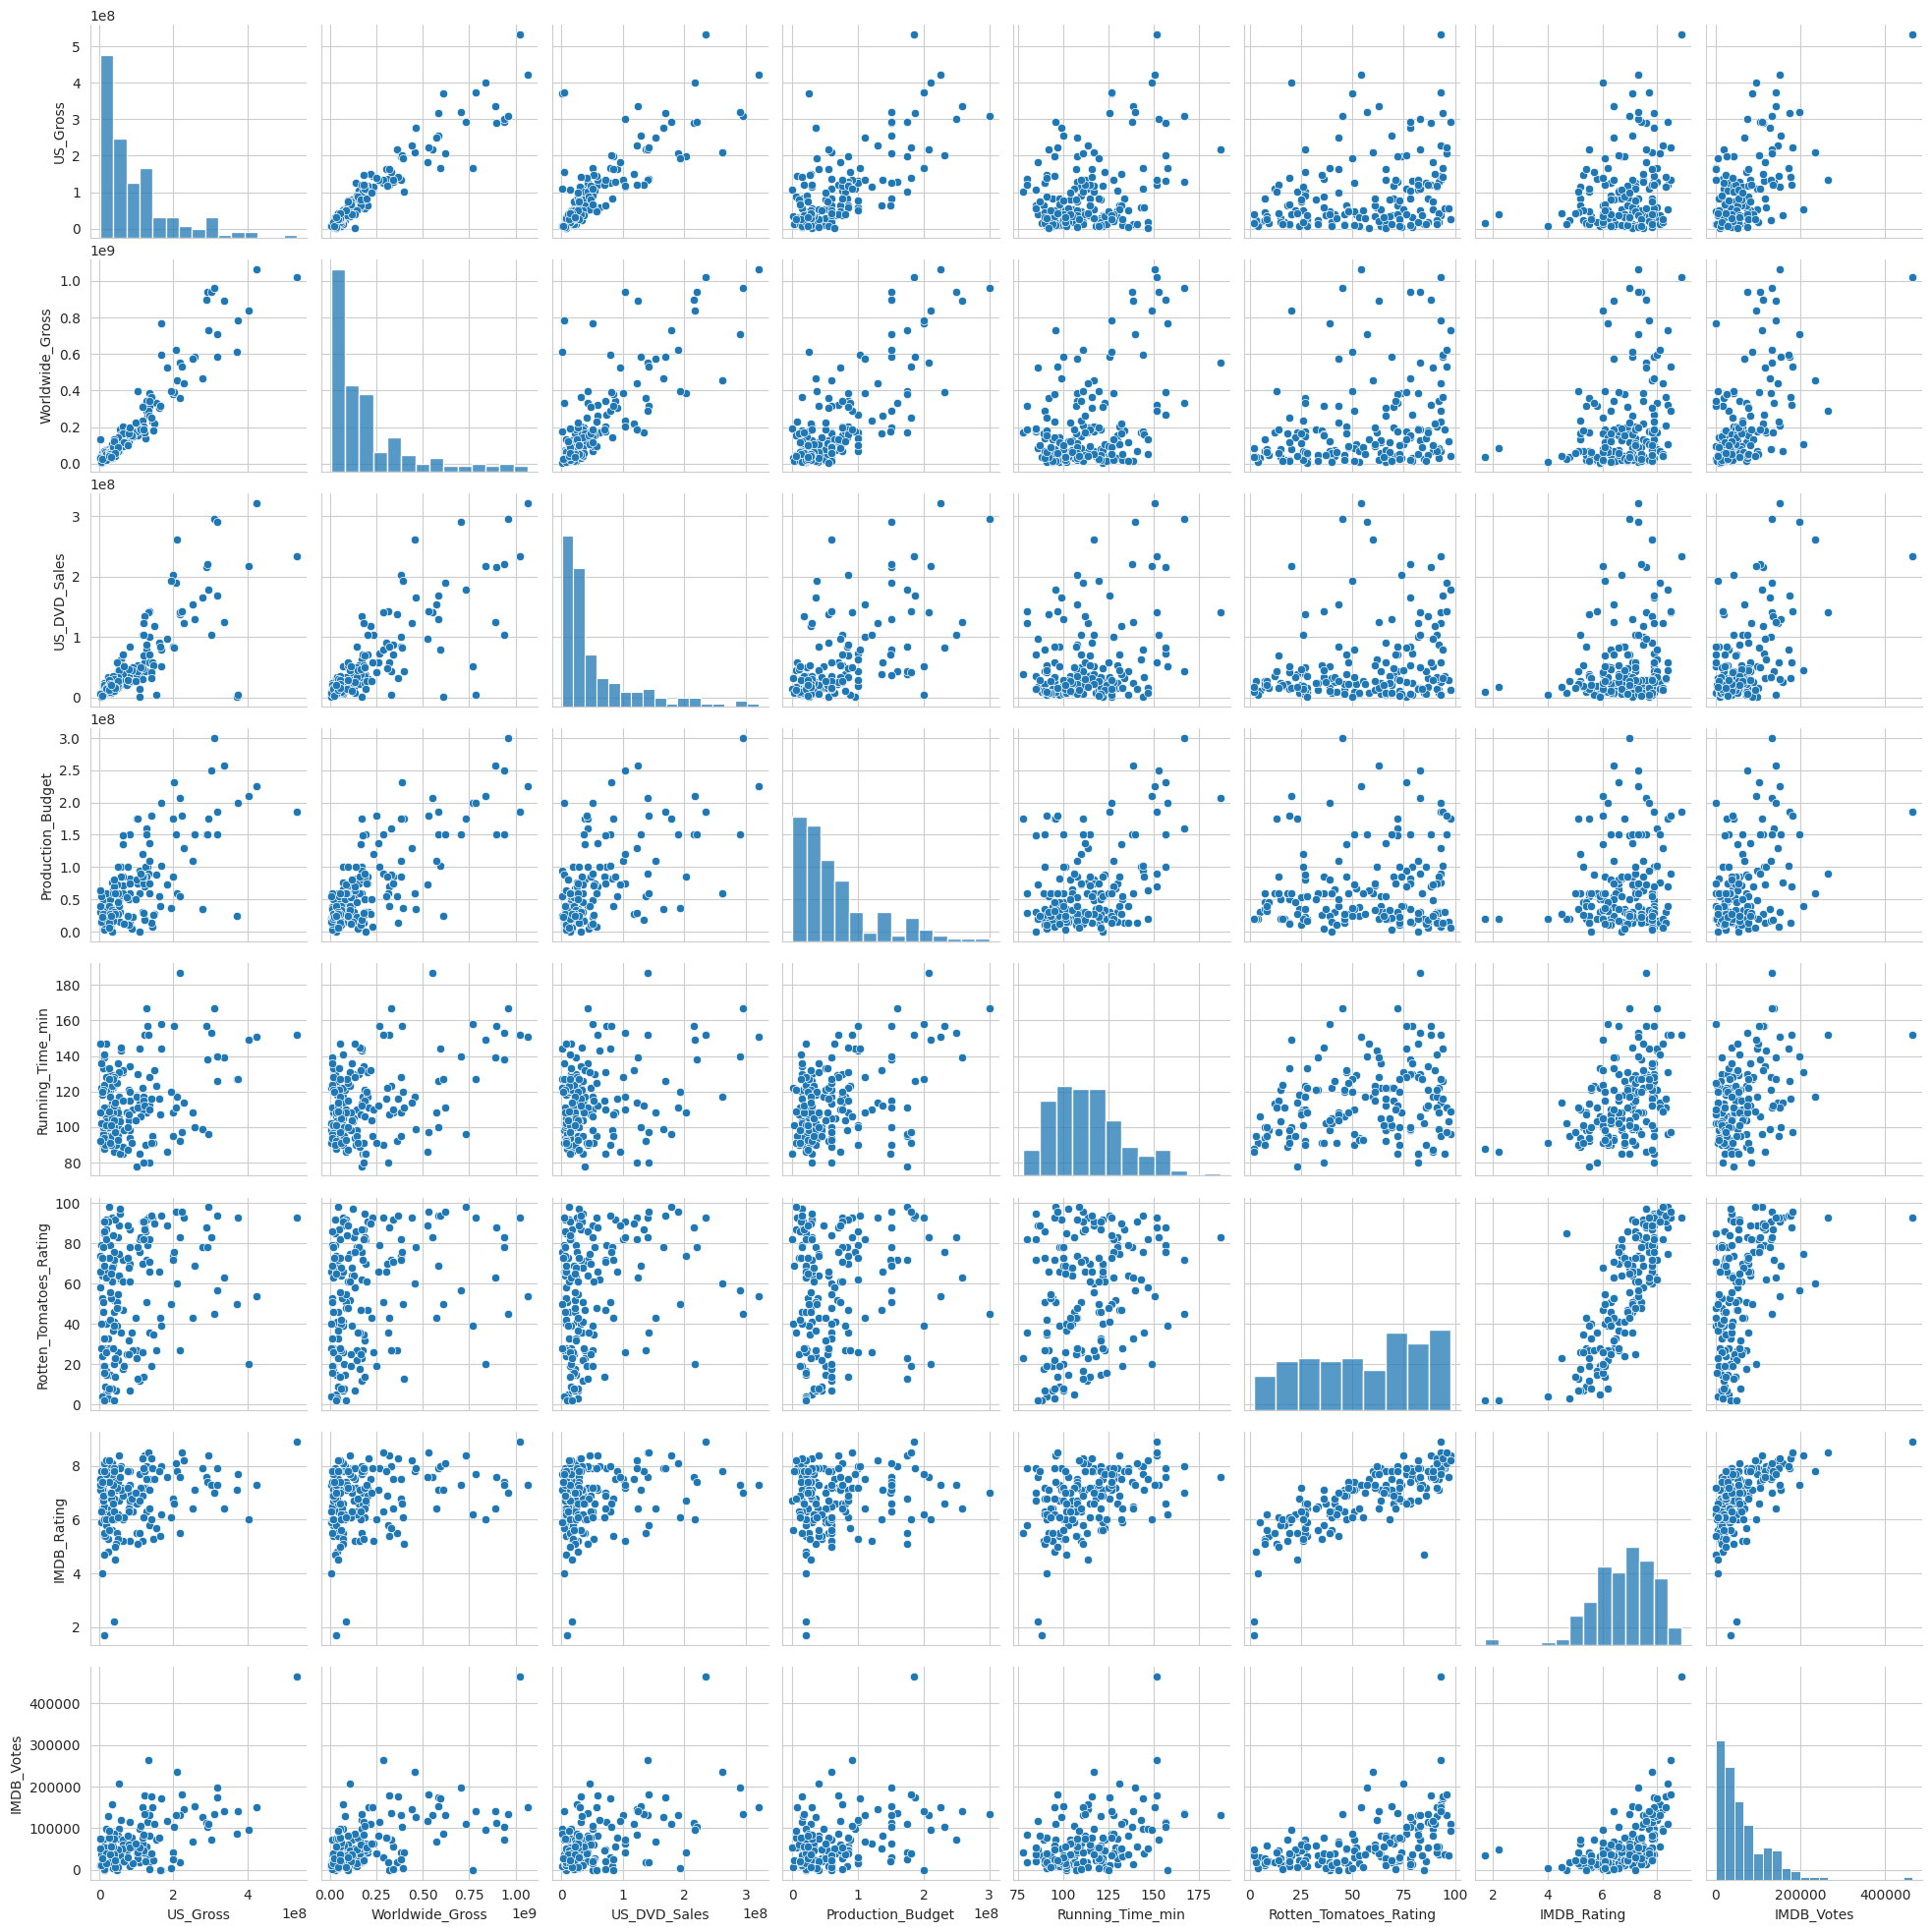

In [9]:
sns.pairplot(df)

The code produces pair plots of all the numerical columns using seaborn, which displays pairwise relationships between the variables in the DataFrame in the form of scatter plots and histograms. The plot can be used to visualize correlations between pairs of variables, distributions of individual variables, and identify any potential outliers in the data.

##### $\rightarrow$ Plot the correlation matrix to explore relationships between the numerical variables.

##### Solution

To show the correlation matrix to explore the relationships between the numerical values, you could use a cool heat map or even a boring df.corr comand. The results should still be the same

<Axes: >

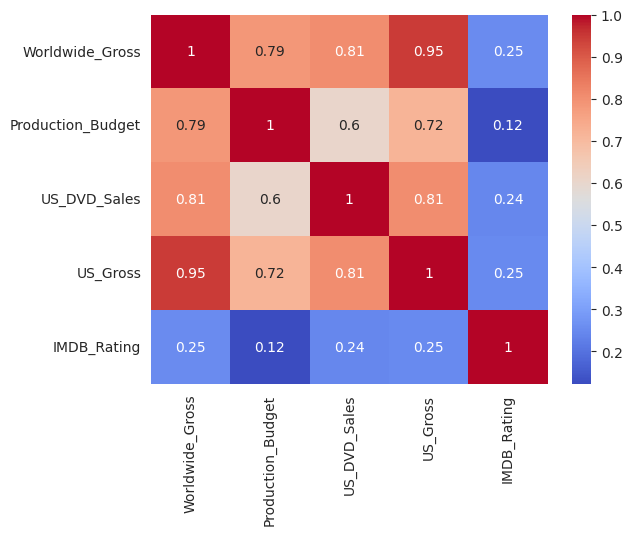

In [10]:
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The code calculates the correlation matrix between all the numerical columns in the movie dataset using pandas' corr() function. 

It then creates a heatmap of the correlation matrix using seaborn, which displays the strength and direction of the linear relationship between the variables in the form of a color-coded matrix. The diagonal of the matrix shows the correlation of each variable with itself, which is always 1. The annotation on the heatmap shows the correlation coefficient values for each pair of variables. This plot can be used to identify which variables are highly correlated with each other, and can help inform feature selection for regression modeling.

or

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
US_Gross,1.000000,0.945884,0.805957,0.716107,0.324815,0.272995,0.249241,0.626820
Worldwide_Gross,0.945884,1.000000,0.805460,0.786412,0.415510,0.273585,0.253299,0.589141
US_DVD_Sales,0.805957,0.805460,1.000000,0.603094,0.299024,0.237974,0.242352,0.557508
Production_Budget,0.716107,0.786412,0.603094,1.000000,0.414008,0.138919,0.121940,0.403616
Running_Time_min,0.324815,0.415510,0.299024,0.414008,1.000000,0.266890,0.402948,0.413505
Rotten_Tomatoes_Rating,0.272995,0.273585,0.237974,0.138919,0.266890,1.000000,0.799496,0.493600
IMDB_Rating,0.249241,0.253299,0.242352,0.121940,0.402948,0.799496,1.000000,0.560185
IMDB_Votes,0.626820,0.589141,0.557508,0.403616,0.413505,0.493600,0.560185,1.000000


This command produces information that shows strength and direction of the linear relationship between pairs of variables. 

 By examining the correlation matrix, you can gain insights into the relationships between variables and make informed decisions about which variables to include in your model.

 Heat map is way better visually to attain information. 

## Modeling

### Worldwide gross and production budget

##### $\rightarrow$ Complete the following:

1.  Make a scatter plot of the production budget and worldwide gross of the movie. Describe the relationship.

2.  Perform a regression analysis predicting worldwide gross from production budget. 

    a. Use graphical and numerical methods to assess the fit of a simple linear regression model.
    
    b. Determine whether a quadratic regression model is better than a simple linear regression model.

### Solution

1)

<Axes: xlabel='Production_Budget', ylabel='Worldwide_Gross'>

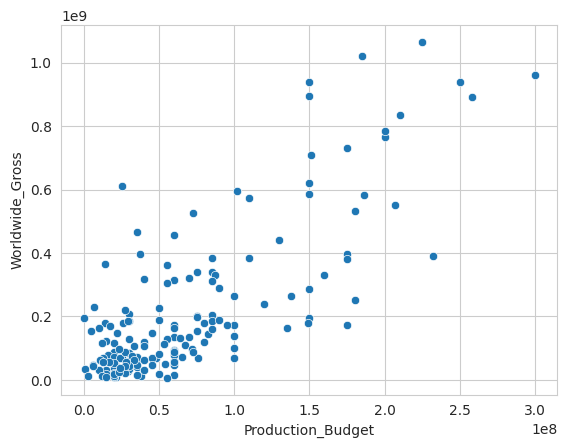

In [12]:
sns.scatterplot(x = 'Production_Budget', y = 'Worldwide_Gross', data=df)

The code creates a scatter plot using seaborn that displays the relationship between the 'Production_Budget' and 'Worldwide_Gross' columns in the movie dataset. The x-axis represents 'Production_Budget' and the y-axis represents 'Worldwide_Gross'. Each point in the plot represents a movie, and its position represents the value of its 'Production_Budget' and 'Worldwide_Gross' columns.

The code produces a  plot can be used to gain a better understanding of the relationship between the two variables, identify any patterns or outliers, and make some initial assumptions about whether a linear regression model would be a good fit for the data. 

The data suggests a positive correlation between production budget and worldwide gross on a larger scale, implying that higher production budgets tend to result in higher worldwide grosses. However, upon closer inspection of the densely populated points, this positive correlation appears to be less strong, although still present. This observation was made by changing the x limit to zoom in on the dense section of points.

2 a)

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 08 May 2023   Prob (F-statistic):           7.95e-38
Time:                        02:32:01   Log-Likelihood:                -3516.7
No. Observations:                 174   AIC:                             7037.
Df Residuals:                     172   BIC:                             7044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.642e+06   1.66e+0

<Axes: title={'center': 'Production Budget vs, Worldwide Gross'}, xlabel='Production_Budget', ylabel='Worldwide_Gross'>

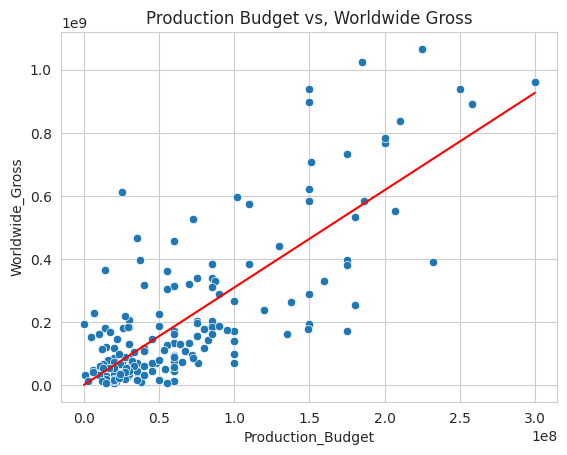

In [22]:
X = df['Production_Budget']
y = df['Worldwide_Gross']
X = sm.add_constant(X)

# Print the summary of the quadratic regression model
model = sm.OLS(y, X).fit()
print(model.summary())

#Plot the data and linear regression line
sns.scatterplot(x='Production_Budget', y='Worldwide_Gross', data=df)
plt.title('Production Budget vs, Worldwide Gross')
sns.lineplot(x=X['Production_Budget'], y=model.predict(X), color='red')



The purpose of this code is to perform a simple linear regression analysis to predict worldwide gross from production budget. 

The output includes the model summary statistics, a scatterplot of the data, and a regression line plotted on top of the scatterplot. The regression line represents the predicted values of worldwide gross based on the production budget. The slope of the line represents the estimated increase in worldwide gross for each unit increase in production budget.

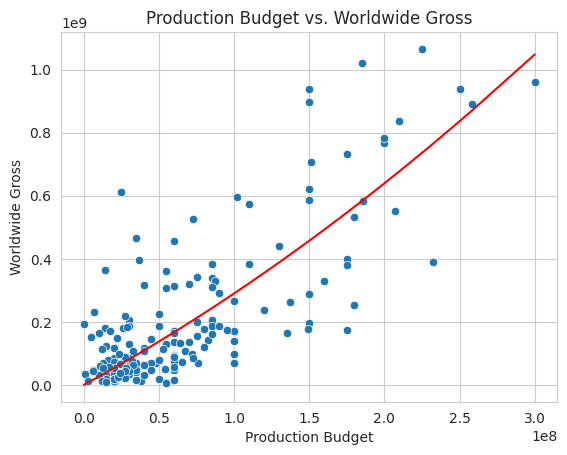

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.88e-38
Time:                        02:30:13   Log-Likelihood:                -3515.3
No. Observations:                 174   AIC:                             7035.
Df Residuals:                     172   BIC:                             7041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.396e-08   6.46e-09      8.353      0.0

In [19]:
X = df['Production_Budget']
y = df['Worldwide_Gross']
X_sq = X**2
X_quad = np.column_stack((X, X_sq))
X_quad = sm.add_constant(X_quad)
model = sm.OLS(y, X_quad).fit()

# Plot the data and quadratic regression curve
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=model.predict(X_quad), color='red')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.show()

# Print the summary of the quadratic regression model
model = sm.OLS(y, X_quad).fit()

print(model.summary())

This code fits a quadratic regression model to the relationship between the 'Production_Budget' and 'Worldwide_Gross' variables in a movie dataset and prints the summary of the regression model using the statsmodels package.

The output of the code provides valuable information for understanding the relationship between the two variables and for assessing the quality of the regression model.

b) 

Based on the R-squared values, it appears that the quadratic regression model provides a slightly better fit to the data than the linear regression model. The R-squared value for the quadratic regression (0.625) is higher than that for the linear regression (0.618), indicating that the quadratic regression model explains a larger proportion of the variance in the Worldwide_Gross variable. 

### Incorporating movie ratings

##### $\rightarrow$ Complete the following:

1.  Perform a regression analysis predicting worldwide gross from production budget and movie ratings from Rotten Tomatoes and IMDB.

    a. Does the addition of either the Rotten Tomatoes or IMDB ratings to the model containing production budget improve the prediction of worldwide gross?
    
    b. Is it useful to include both Rotten Tomatoes and IMDB ratings as predictors in the model?

### Solution

1 a) 

In [15]:
model = smf.ols('Worldwide_Gross ~ Production_Budget + IMDB_Rating + Rotten_Tomatoes_Rating', data=df).fit()

# Model without ratings
model1 = smf.ols('Worldwide_Gross ~ Production_Budget', data=df).fit()
print(model1.summary())

# Model with ratings
model2 = smf.ols('Worldwide_Gross ~ Production_Budget + IMDB_Rating + Rotten_Tomatoes_Rating', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 08 May 2023   Prob (F-statistic):           7.95e-38
Time:                        02:22:51   Log-Likelihood:                -3516.7
No. Observations:                 174   AIC:                             7037.
Df Residuals:                     172   BIC:                             7044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.642e+06   1.66e+0

The code performs multiple linear regression analysis to predict Worldwide Gross based on Production Budget and two ratings (IMDB and Rotten Tomatoes).

The output includes summary statistics of two models: one with only Production Budget as predictor, and another one with Production Budget and ratings as predictors. The models' coefficients, standard errors, R-squared, and p-values are reported in the output.

Based on the summary output, the multiple regression model that includes the predictors Production_Budget, IMDB_Rating, and Rotten_Tomatoes_Rating has an R-squared value of 0.648, which is higher than the R-squared values of both the linear and quadratic regression models. This suggests that adding the movie ratings as predictors improves the model's ability to predict Worldwide_Gross.

1 b) 

In [16]:
model1 = smf.ols('Worldwide_Gross ~ Production_Budget', data=df).fit()

# Model with ratings
model2 = smf.ols('Worldwide_Gross ~ Production_Budget + IMDB_Rating + Rotten_Tomatoes_Rating', data=df).fit()

# Perform F-test to compare the models
f_test = model2.compare_f_test(model1)

# Print results
print(f_test)

(7.109792972960524, 0.001082966843812233, 2.0)


The purpose of this code is to perform an F-test to compare the two linear regression models, one with only the production budget predictor and another one with the 'Production_Budget', 'IMDB_Rating', and 'Rotten_Tomatoes_Rating' predictors.

The output shows the F-statistic, degrees of freedom, and p-value. The low p-value indicates that the model with additional predictors (IMDB and Rotten Tomatoes ratings) significantly improves the prediction of worldwide gross compared to the model with production budget only.